In [2]:
from utils.binaries import *
from utils.plotting import *
from utils.Auger.SD import UubRandoms

09:50:45 (  +59.8s) [INFO   ] -- import logging
09:50:45 (  +163ms) [INFO   ] -- import numpy as np
09:50:45 (    +7ms) [INFO   ] -- import uncertainties
09:50:45 (  +203ms) [INFO   ] -- import pandas as pd
09:50:45 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
09:50:45 (    +2ms) [INFO   ] -- import binaries.tools as tools
09:50:46 (  +304ms) [INFO   ] -- import matplotlib.pyplot as plt
09:50:46 (  +432ms) [INFO   ] -- import seaborn as so
09:50:46 (    +3ms) [INFO   ] -- import plotting.tools as plot
09:50:46 (    +6ms) [DEBUG  ] -- font size set to 9.5
09:50:46 (    +1ms) [DEBUG  ] -- label size set to 13.0
09:50:46 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
09:50:46 (    +1ms) [DEBUG  ] -- markersize set to 2.0
09:50:46 (    +0ms) [DEBUG  ] -- usetex set to False


In [2]:
station = "Nadia"
randoms = UubRandoms.UubRandom(station, detectors="wcd")

In [3]:
station_bias = []

for file in tools.ProgressBar(randoms):
    for trace in file:
        if trace["t1_latch_bin"] == -1:
            continue

        pmt1, pmt2, pmt3 = trace["traces"]
        peaks = [pmt1.max(), pmt2.max(), pmt3.max()]

        for pmt in [pmt1, pmt2, pmt3]:
            for bin, adc in enumerate(pmt):
                if adc > 30:
                    break
            else:
                continue

            bin = max(min(bin, len(pmt) - 51), 19)
            peaks.append(pmt[bin - 19 : bin + 50].max())

        station_bias.append(peaks)

    np.savetxt(station + ".txt", np.array(station_bias), fmt="%i")

1434/1434 [********************] || 01:04:01>00:00:00,         0.37 it/s


In [3]:
df1 = pd.read_csv(
    "NuriaJr.txt",
    names=["spmt1", "spmt2", "spmt3", "mpmt1", "mpmt2", "mpmt3"],
    delimiter=" ",
)
df2 = pd.read_csv(
    "Svenja.txt",
    names=["spmt1", "spmt2", "spmt3", "mpmt1", "mpmt2", "mpmt3"],
    delimiter=" ",
)
df3 = pd.read_csv(
    "Constanza.txt",
    names=["spmt1", "spmt2", "spmt3", "mpmt1", "mpmt2", "mpmt3"],
    delimiter=" ",
)
df4 = pd.read_csv(
    "Nadia.txt",
    names=["spmt1", "spmt2", "spmt3", "mpmt1", "mpmt2", "mpmt3"],
    delimiter=" ",
)

In [4]:
df = pd.concat([df1, df2, df3, df4])
df

,spmt1,spmt2,spmt3,mpmt1,mpmt2,mpmt3
0,397,479,878,252,342,175
1,826,425,498,826,425,498
2,630,2146,800,630,2146,800
3,439,1115,678,439,1115,678
4,483,698,597,483,698,597
...,...,...,...,...,...,...
14041,2029,636,530,2029,636,530
14042,327,766,371,327,766,371
14043,469,490,1081,469,490,1081
14044,350,1053,488,350,1053,488


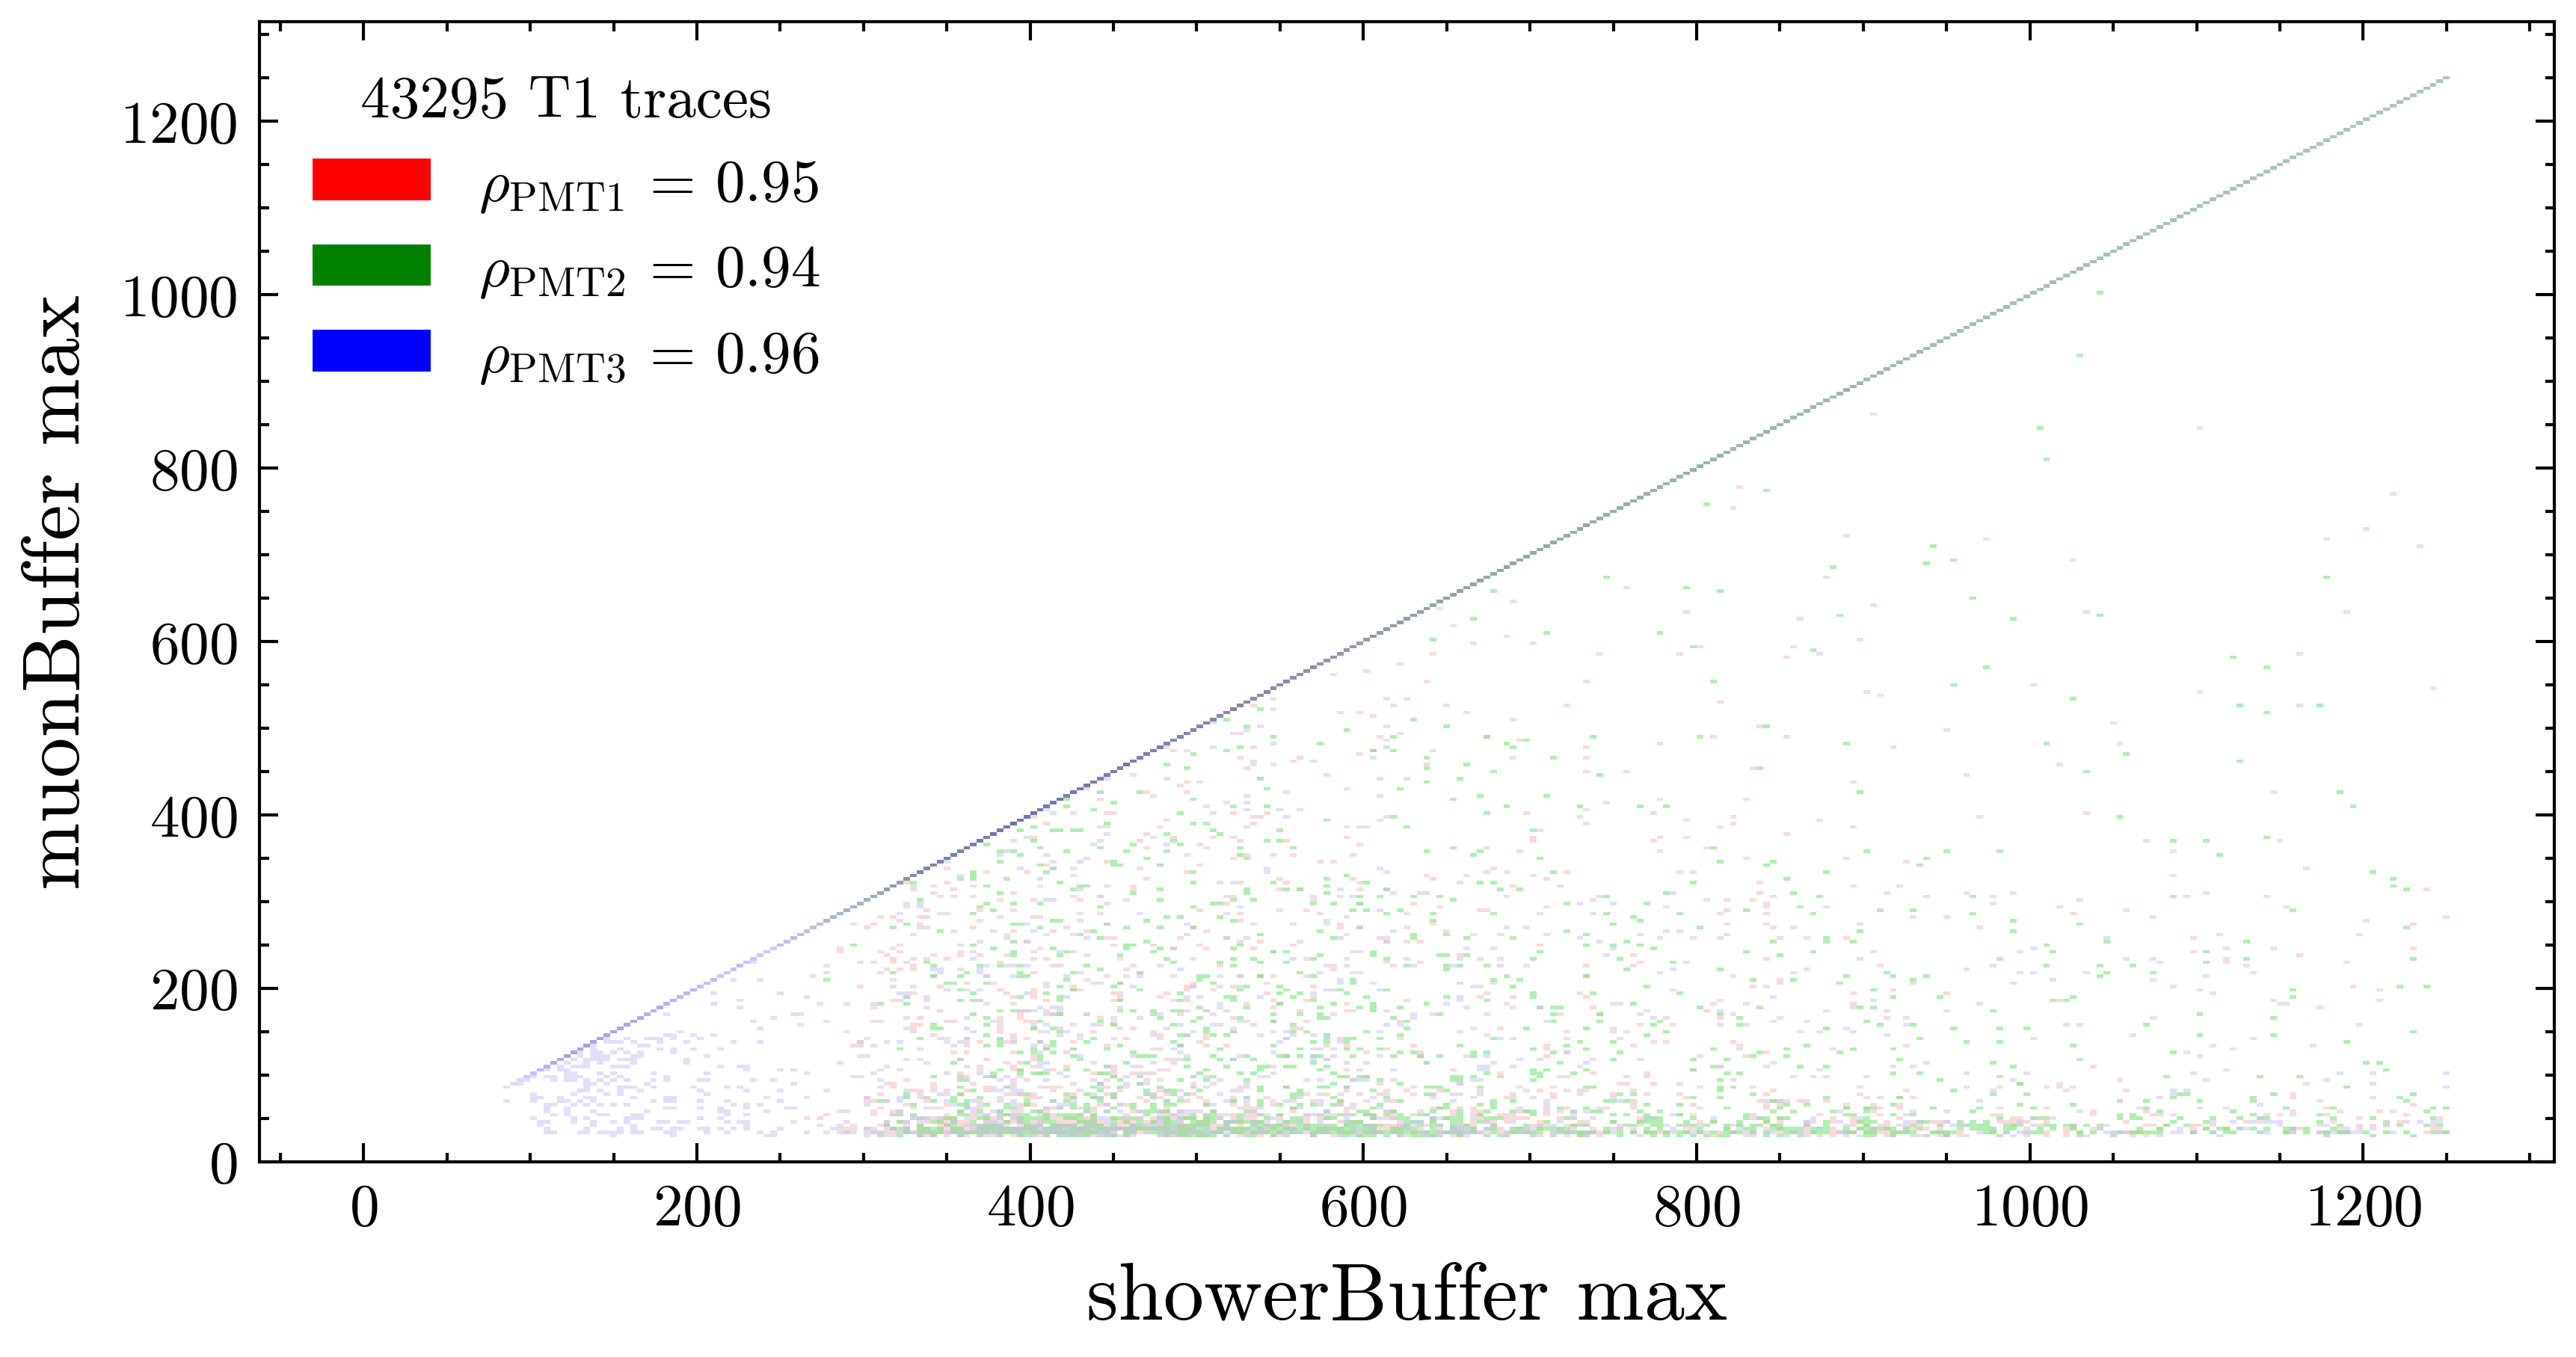

In [7]:
fig, ax = plt.subplots()

so.histplot(
    df,
    x="spmt1",
    y="mpmt1",
    ax=ax,
    color="red",
    binwidth=4,
    binrange=(0, 1250),
    alpha=0.5,
)
so.histplot(
    df,
    x="spmt2",
    y="mpmt2",
    ax=ax,
    color="green",
    binwidth=4,
    binrange=(0, 1250),
    alpha=0.5,
)
so.histplot(
    df,
    x="spmt3",
    y="mpmt3",
    ax=ax,
    color="blue",
    binwidth=4,
    binrange=(0, 1250),
    alpha=0.5,
)

ax.hist(
    [],
    color="red",
    label=rf"$\rho_{{\mathrm{{PMT}} 1}}$ = {np.corrcoef([df.spmt1, df.mpmt1])[0, 1]:.2f}",
)
ax.hist(
    [],
    color="green",
    label=rf"$\rho_{{\mathrm{{PMT}} 2}}$ = {np.corrcoef([df.spmt2, df.mpmt2])[0, 1]:.2f}",
)
ax.hist(
    [],
    color="blue",
    label=rf"$\rho_{{\mathrm{{PMT}} 3}}$ = {np.corrcoef([df.spmt3, df.mpmt3])[0, 1]:.2f}",
)

ax.set_xlabel(r"showerBuffer max")
ax.set_ylabel(r"muonBuffer max")
ax.legend(loc="upper left", title=f"{len(df)} T1 traces")

# ax.set_xlim(250, 1250)
# ax.set_ylim(0, 1000)

In [5]:
ShwrBuffer = df.spmt1 + df.spmt2 + df.spmt3
MuonBuffer = df.mpmt1 + df.mpmt2 + df.mpmt3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


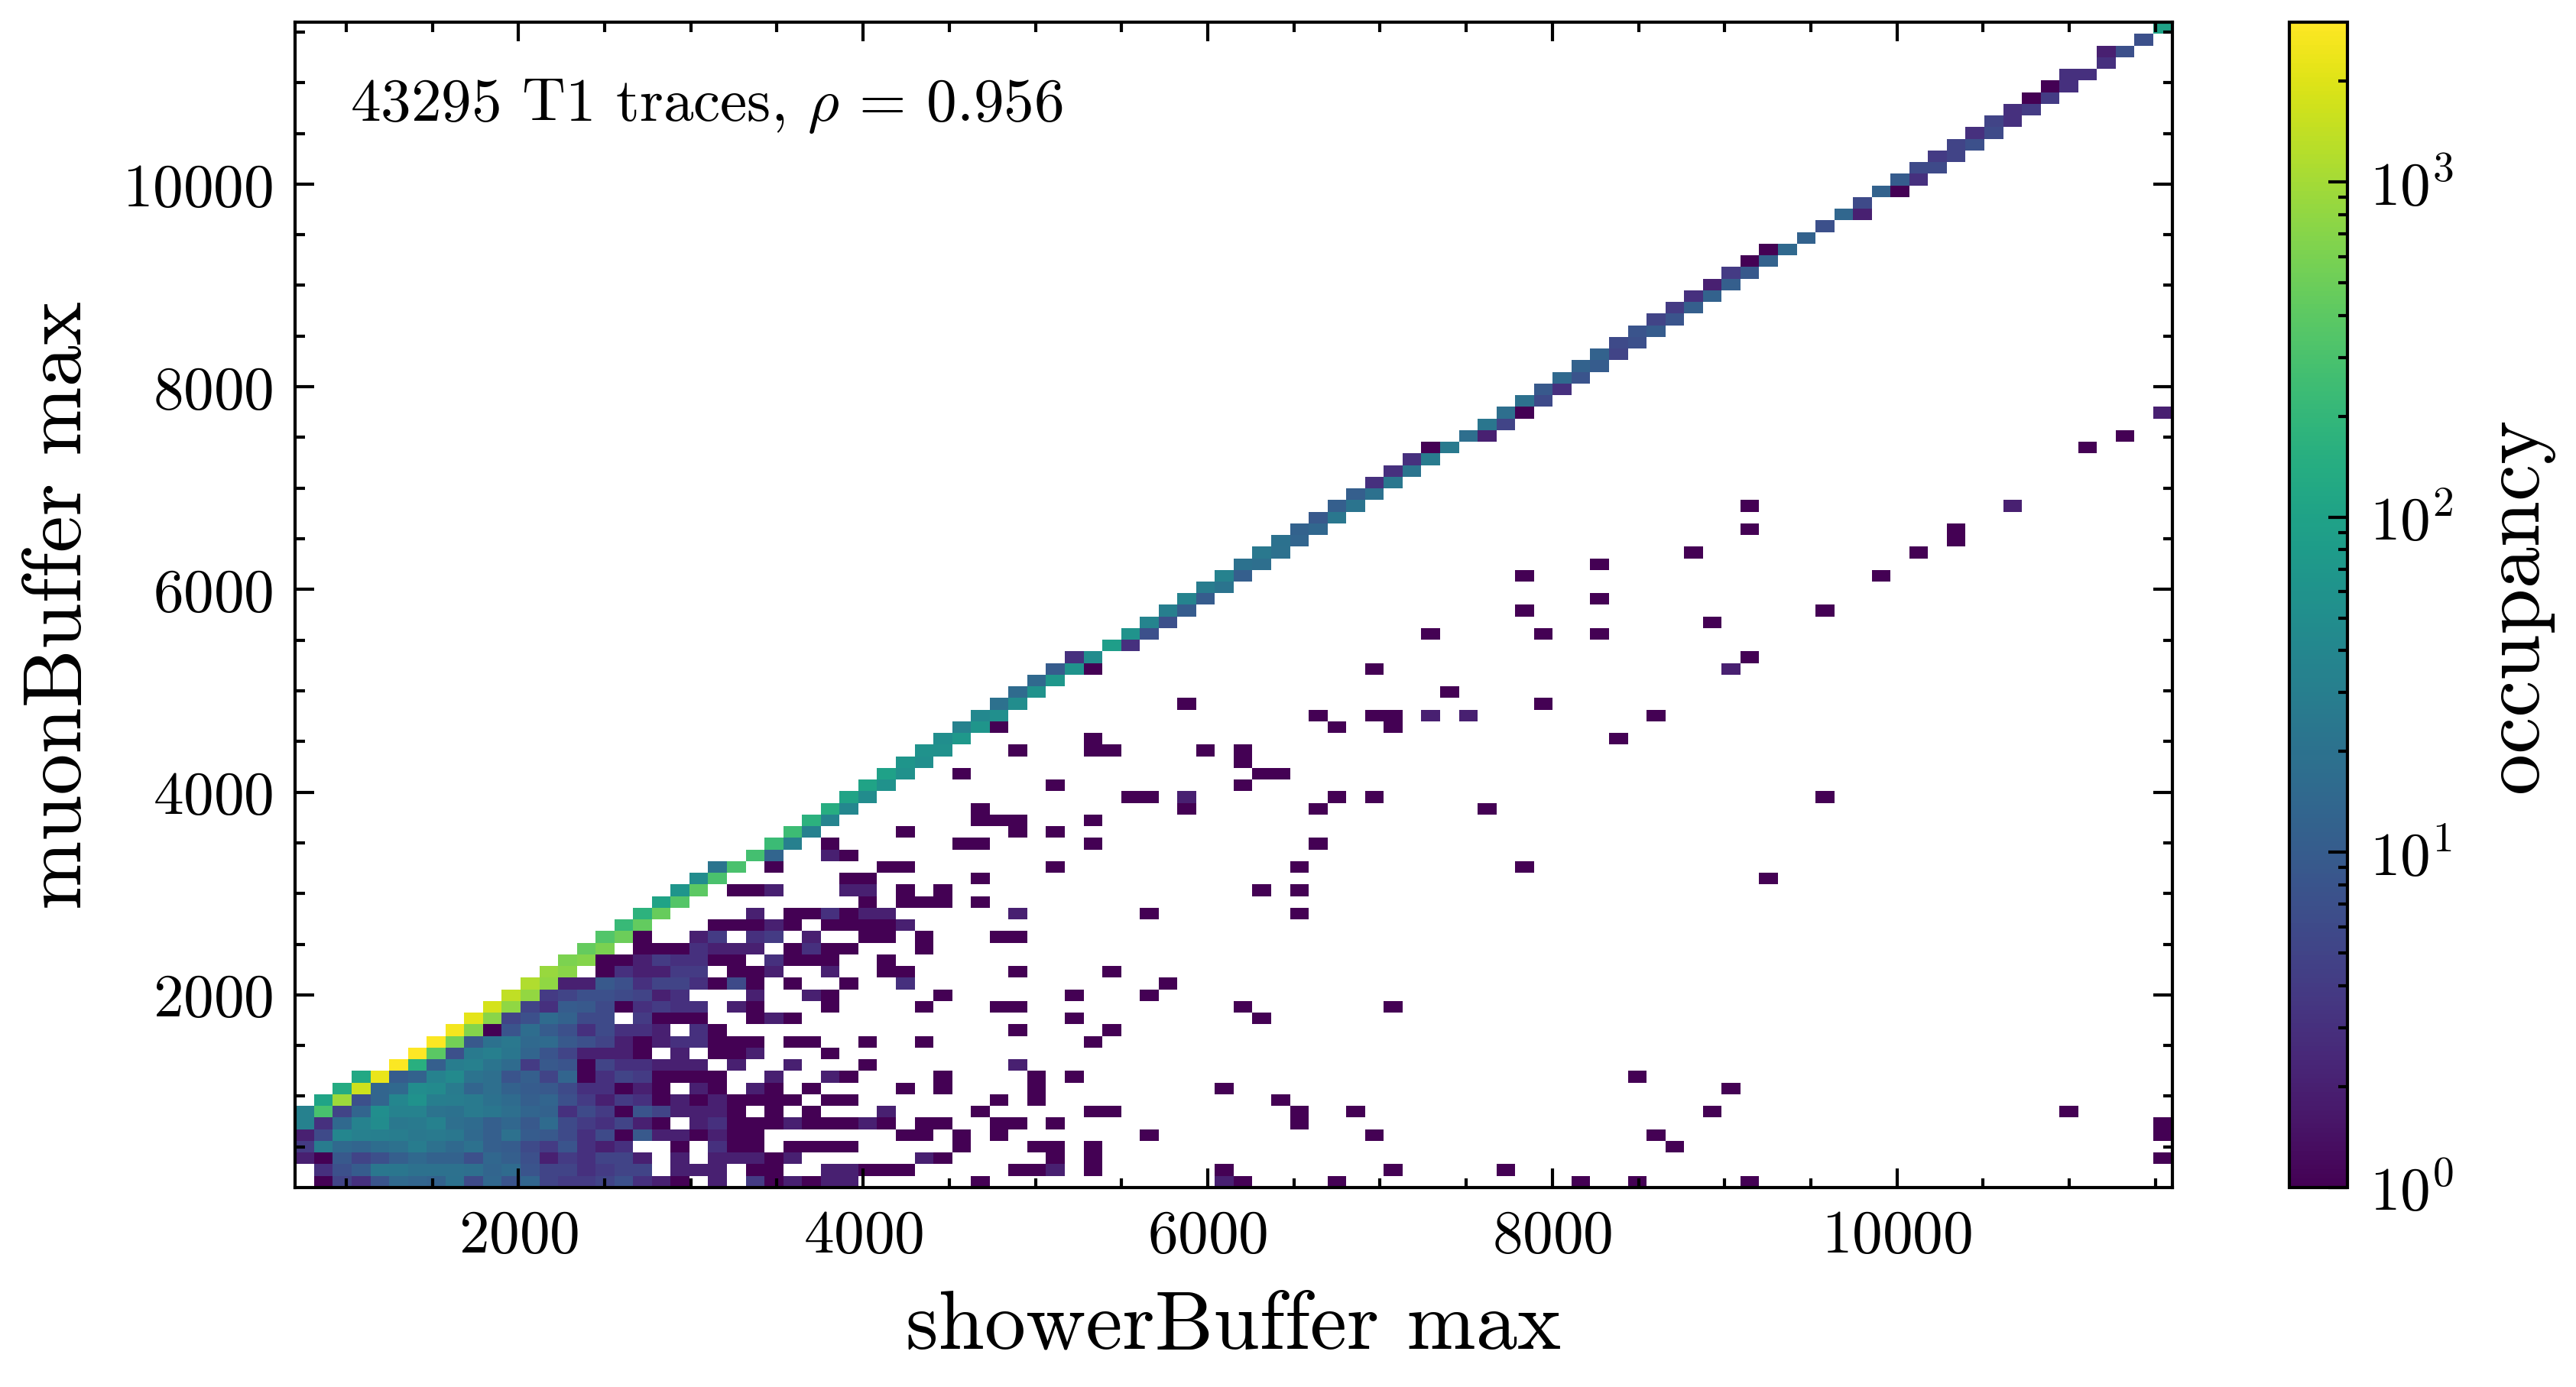

In [13]:
h = plt.hist2d(ShwrBuffer, MuonBuffer, bins=100, norm="log")
plt.colorbar(h[3], ax=plt.gca(), label="occupancy")

plt.xlabel(r"showerBuffer max")
plt.ylabel(r"muonBuffer max")
plt.legend(
    loc="upper left",
    title=rf"{len(df)} T1 traces, $\rho$ = {np.corrcoef(ShwrBuffer, MuonBuffer)[0, 1]:.3f}",
)

In [10]:
np.corrcoef(ShwrBuffer, MuonBuffer)

array([[1.        , 0.95574131],
       [0.95574131, 1.        ]])